In [1]:
import numpy as np 
import os
import time
import pandas as pd 
from scipy import stats

In [6]:
DATASET_PATH='../Data Set/CICIDS/preprocesd_cicids.csv'
print(DATASET_PATH)

../Data Set/CICIDS/preprocesd_cicids.csv


In [7]:
# ,nrows=10000, header=0
start = time.time()
df=pd.read_csv(DATASET_PATH)
df.head()
print("Time taken to load the data: ", time.time()-start," seconds")

Time taken to load the data:  23.375220775604248  seconds


In [8]:
df.shape

(2520798, 79)

In [9]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr(numeric_only=True)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
              colname = corr_matrix.columns[i]                  
              col_corr.add(colname)
    return col_corr

In [10]:
corr_features = correlation(df, 0.85)
corr_features

{' Active Min',
 ' Average Packet Size',
 ' Avg Bwd Segment Size',
 ' Avg Fwd Segment Size',
 ' Bwd IAT Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' CWE Flag Count',
 ' ECE Flag Count',
 ' Flow IAT Max',
 ' Fwd Header Length.1',
 ' Fwd IAT Max',
 ' Fwd IAT Mean',
 ' Fwd IAT Min',
 ' Fwd IAT Std',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 ' Idle Max',
 ' Idle Min',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' SYN Flag Count',
 ' Subflow Bwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Fwd Bytes',
 ' Total Backward Packets',
 ' Total Length of Bwd Packets',
 ' act_data_pkt_fwd',
 ' min_seg_size_forward',
 'Fwd IAT Total',
 'Fwd Packets/s',
 'Idle Mean',
 'Subflow Fwd Packets'}

In [11]:
df.drop(corr_features,axis=1,inplace=True)

In [12]:
df.shape

(2520798, 44)

In [13]:
# create a Series with the count of rows in each group
label_counts = df[' Label'].value_counts()

# create a list of labels that have less than 10,000 rows
labels_to_merge = label_counts[label_counts < 10000].index.tolist()
print(labels_to_merge)

['FTP-Patator', 'DoS slowloris', 'DoS Slowhttptest', 'SSH-Patator', 'Bot', 'Web Attack � Brute Force', 'Web Attack � XSS', 'Infiltration', 'Web Attack � Sql Injection', 'Heartbleed']


In [14]:
# create a new label called 'Other' and merge the labels with less than 10,000 rows
df[' Label'] = df[' Label'].apply(lambda x: 'Other' if x in labels_to_merge else x)
# group the rows by the new 'Label' column
grouped_df = df.groupby(' Label')

In [15]:
df.shape

(2520798, 44)

In [16]:
df[' Label'].value_counts()

BENIGN           2095057
DoS Hulk          172846
DDoS              128014
PortScan           90694
Other              23901
DoS GoldenEye      10286
Name:  Label, dtype: int64

In [18]:
# Count the number of instances for each class
class_counts = df[' Label'].value_counts()
print(class_counts)

BENIGN           2095057
DoS Hulk          172846
DDoS              128014
PortScan           90694
Other              23901
DoS GoldenEye      10286
Name:  Label, dtype: int64


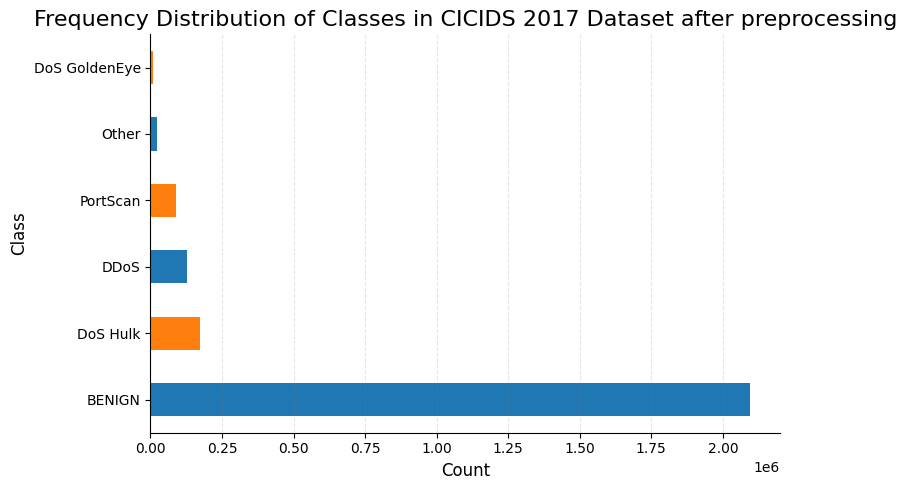

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a horizontal bar plot of the frequency distribution of classes
fig, ax = plt.subplots(figsize=(8, 5))
class_counts.plot(kind='barh', color=['#1f77b4', '#ff7f0e'])
ax.set_title('Frequency Distribution of Classes in CICIDS 2017 Dataset after preprocessing', fontsize=16)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Class', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(True, linestyle='--', color='gray', alpha=0.2)
ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(' Label', axis=1), df[' Label'], test_size=0.30, random_state=0)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = clf.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9984865915582355


In [19]:
df.shape

(2520798, 44)

In [23]:
x = df.drop([' Label'],axis=1)
y = df[' Label']

In [24]:
x.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,...,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,Active Mean,Active Std,Active Max,Idle Std
0,54865,3,2,12,6,6,0,0,4000000.00,666666.700,...,0,0,0,0,33,-1,0.0,0.0,0,0.0
1,55054,109,1,6,6,6,6,6,110091.74,18348.623,...,0,0,0,0,29,256,0.0,0.0,0,0.0
2,55055,52,1,6,6,6,6,6,230769.23,38461.540,...,0,0,0,0,29,256,0.0,0.0,0,0.0
3,46236,34,1,6,6,6,6,6,352941.20,58823.530,...,0,0,0,0,31,329,0.0,0.0,0,0.0
4,54863,3,2,12,6,6,0,0,4000000.00,666666.700,...,0,0,0,0,32,-1,0.0,0.0,0,0.0


In [25]:
y.head()

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name:  Label, dtype: object

In [26]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
rus.fit(x, y)
Xn, yn = rus.fit_resample(x, y)
# Xn.value_counts()

In [24]:
Xn.shape

(61716, 43)

In [25]:
yn.shape

(61716,)

In [26]:
Xn.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,...,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,Active Mean,Active Std,Active Max,Idle Std
0,53,62874,4,116,29,29,93,93,4803.257300,95.428955,...,0,0,0,0,-1,-1,0.00,0.000,0,0.000
1,57225,86,1,0,0,0,0,0,0.000000,23255.814000,...,0,0,0,0,905,229,0.00,0.000,0,0.000
2,80,116003861,16,440,356,0,340,0,7.344583,0.258612,...,0,0,0,0,8192,4736,46441.09,31255.098,140678,14892.001
3,443,5683083,8,397,216,0,1460,0,723.726870,2.463452,...,0,0,0,0,8192,119,269399.00,0.000,269399,0.000
4,53,23652,1,48,48,48,128,128,7441.231000,84.559450,...,0,0,0,0,-1,-1,0.00,0.000,0,0.000


In [27]:
yn.value_counts()

BENIGN           10286
DDoS             10286
DoS GoldenEye    10286
DoS Hulk         10286
Other            10286
PortScan         10286
Name:  Label, dtype: int64

In [44]:
#z-score   z = (x - mean) / std   
# it can make it easier for the algorithm to learn meaningful patterns in the data
cols = list(Xn.columns)
for col in cols:
    Xn[col] = stats.zscore(Xn[col])

In [45]:
Xn.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,...,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,Active Mean,Active Std,Active Max,Idle Std
0,-0.297014,-0.679777,-0.044940,-0.040850,-0.317990,0.490016,-0.713935,2.190765,-0.038518,-0.190288,...,NaN,NaN,NaN,NaN,-0.848314,-0.194997,-0.227431,-0.131538,-0.233081,-0.200218
1,4.852138,-0.681388,-0.109562,-0.054611,-0.379522,-0.126985,-0.741997,-0.254225,-0.039055,0.008263,...,NaN,NaN,NaN,NaN,-0.784403,-0.153281,-0.227431,-0.131538,-0.233081,-0.200218
2,-0.294582,2.295346,0.213547,-0.002414,0.375840,-0.126985,-0.639404,-0.254225,-0.039054,-0.191104,...,NaN,NaN,NaN,NaN,-0.270364,0.664176,-0.189442,-0.085769,-0.139767,-0.198220
3,-0.261889,-0.535558,0.041222,-0.007515,0.078787,-0.126985,-0.301450,-0.254225,-0.038974,-0.191085,...,NaN,NaN,NaN,NaN,-0.270364,-0.173232,-0.007060,-0.131538,-0.054383,-0.200218
4,-0.297014,-0.680783,-0.109562,-0.048917,-0.277675,0.894258,-0.703374,3.110923,-0.038223,-0.190381,...,NaN,NaN,NaN,NaN,-0.848314,-0.194997,-0.227431,-0.131538,-0.233081,-0.200218


In [30]:
from sklearn.model_selection import  train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xn,yn,test_size=0.30,random_state=0)

In [31]:
print(np.any(np.isnan(X_train)))
print(np.all(np.isfinite(X_train)))

True
False


In [32]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Create an instance of SimpleImputer with 'mean' strategy to replace NaN values
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to X_train and transform X_train and X_test with it
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Apply StandardScaler to X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier as RFC

# model training USING RFC
start = time.time()
Random_Forest = RFC(max_depth=40) 
Random_Forest.fit(X_train, Y_train) 
print("Time taken to train model: ", time.time()-start," seconds")

Time taken to train model:  8.801031589508057  seconds


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
# performance metrics calculation of our model over training data set

start = time.time()
Predict_X =  Random_Forest.predict(X_train)
scores = cross_val_score(Random_Forest, X_train, Y_train, cv=7)
accuracy = metrics.accuracy_score(Y_train,Predict_X)
confusion_matrix = metrics.confusion_matrix(Y_train, Predict_X)
classification = metrics.classification_report(Y_train, Predict_X)
print("Time taken to for performance matric calculation: ", time.time()-start," seconds")

Time taken to for performance matric calculation:  57.20650362968445  seconds


In [35]:
print()
print('--------------------------- Results --------------------------------')
print()
print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()


--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.9971759398392008

Model Accuracy:
 0.9997453762644383

Confusion matrix:
 [[7187    0    0    0    6    5]
 [   0 7236    0    0    0    0]
 [   0    0 7252    0    0    0]
 [   0    0    0 7216    0    0]
 [   0    0    0    0 7227    0]
 [   0    0    0    0    0 7072]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00      7198
         DDoS       1.00      1.00      1.00      7236
DoS GoldenEye       1.00      1.00      1.00      7252
     DoS Hulk       1.00      1.00      1.00      7216
        Other       1.00      1.00      1.00      7227
     PortScan       1.00      1.00      1.00      7072

     accuracy                           1.00     43201
    macro avg       1.00      1.00      1.00     43201
 weighted avg       1.00      1.00      1.00     43201




In [36]:
def plot_confusion_matrix(cm,title,cmap=None,target=None,normalize=False):

    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('viridis')
    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target is not None:
        ticks = np.arange(len(target))
        plt.xticks(ticks, target, rotation=45)
        plt.yticks(ticks, target)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white")
    plt.grid(False)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    plt.savefig(title, bbox_inches='tight', dpi=300)

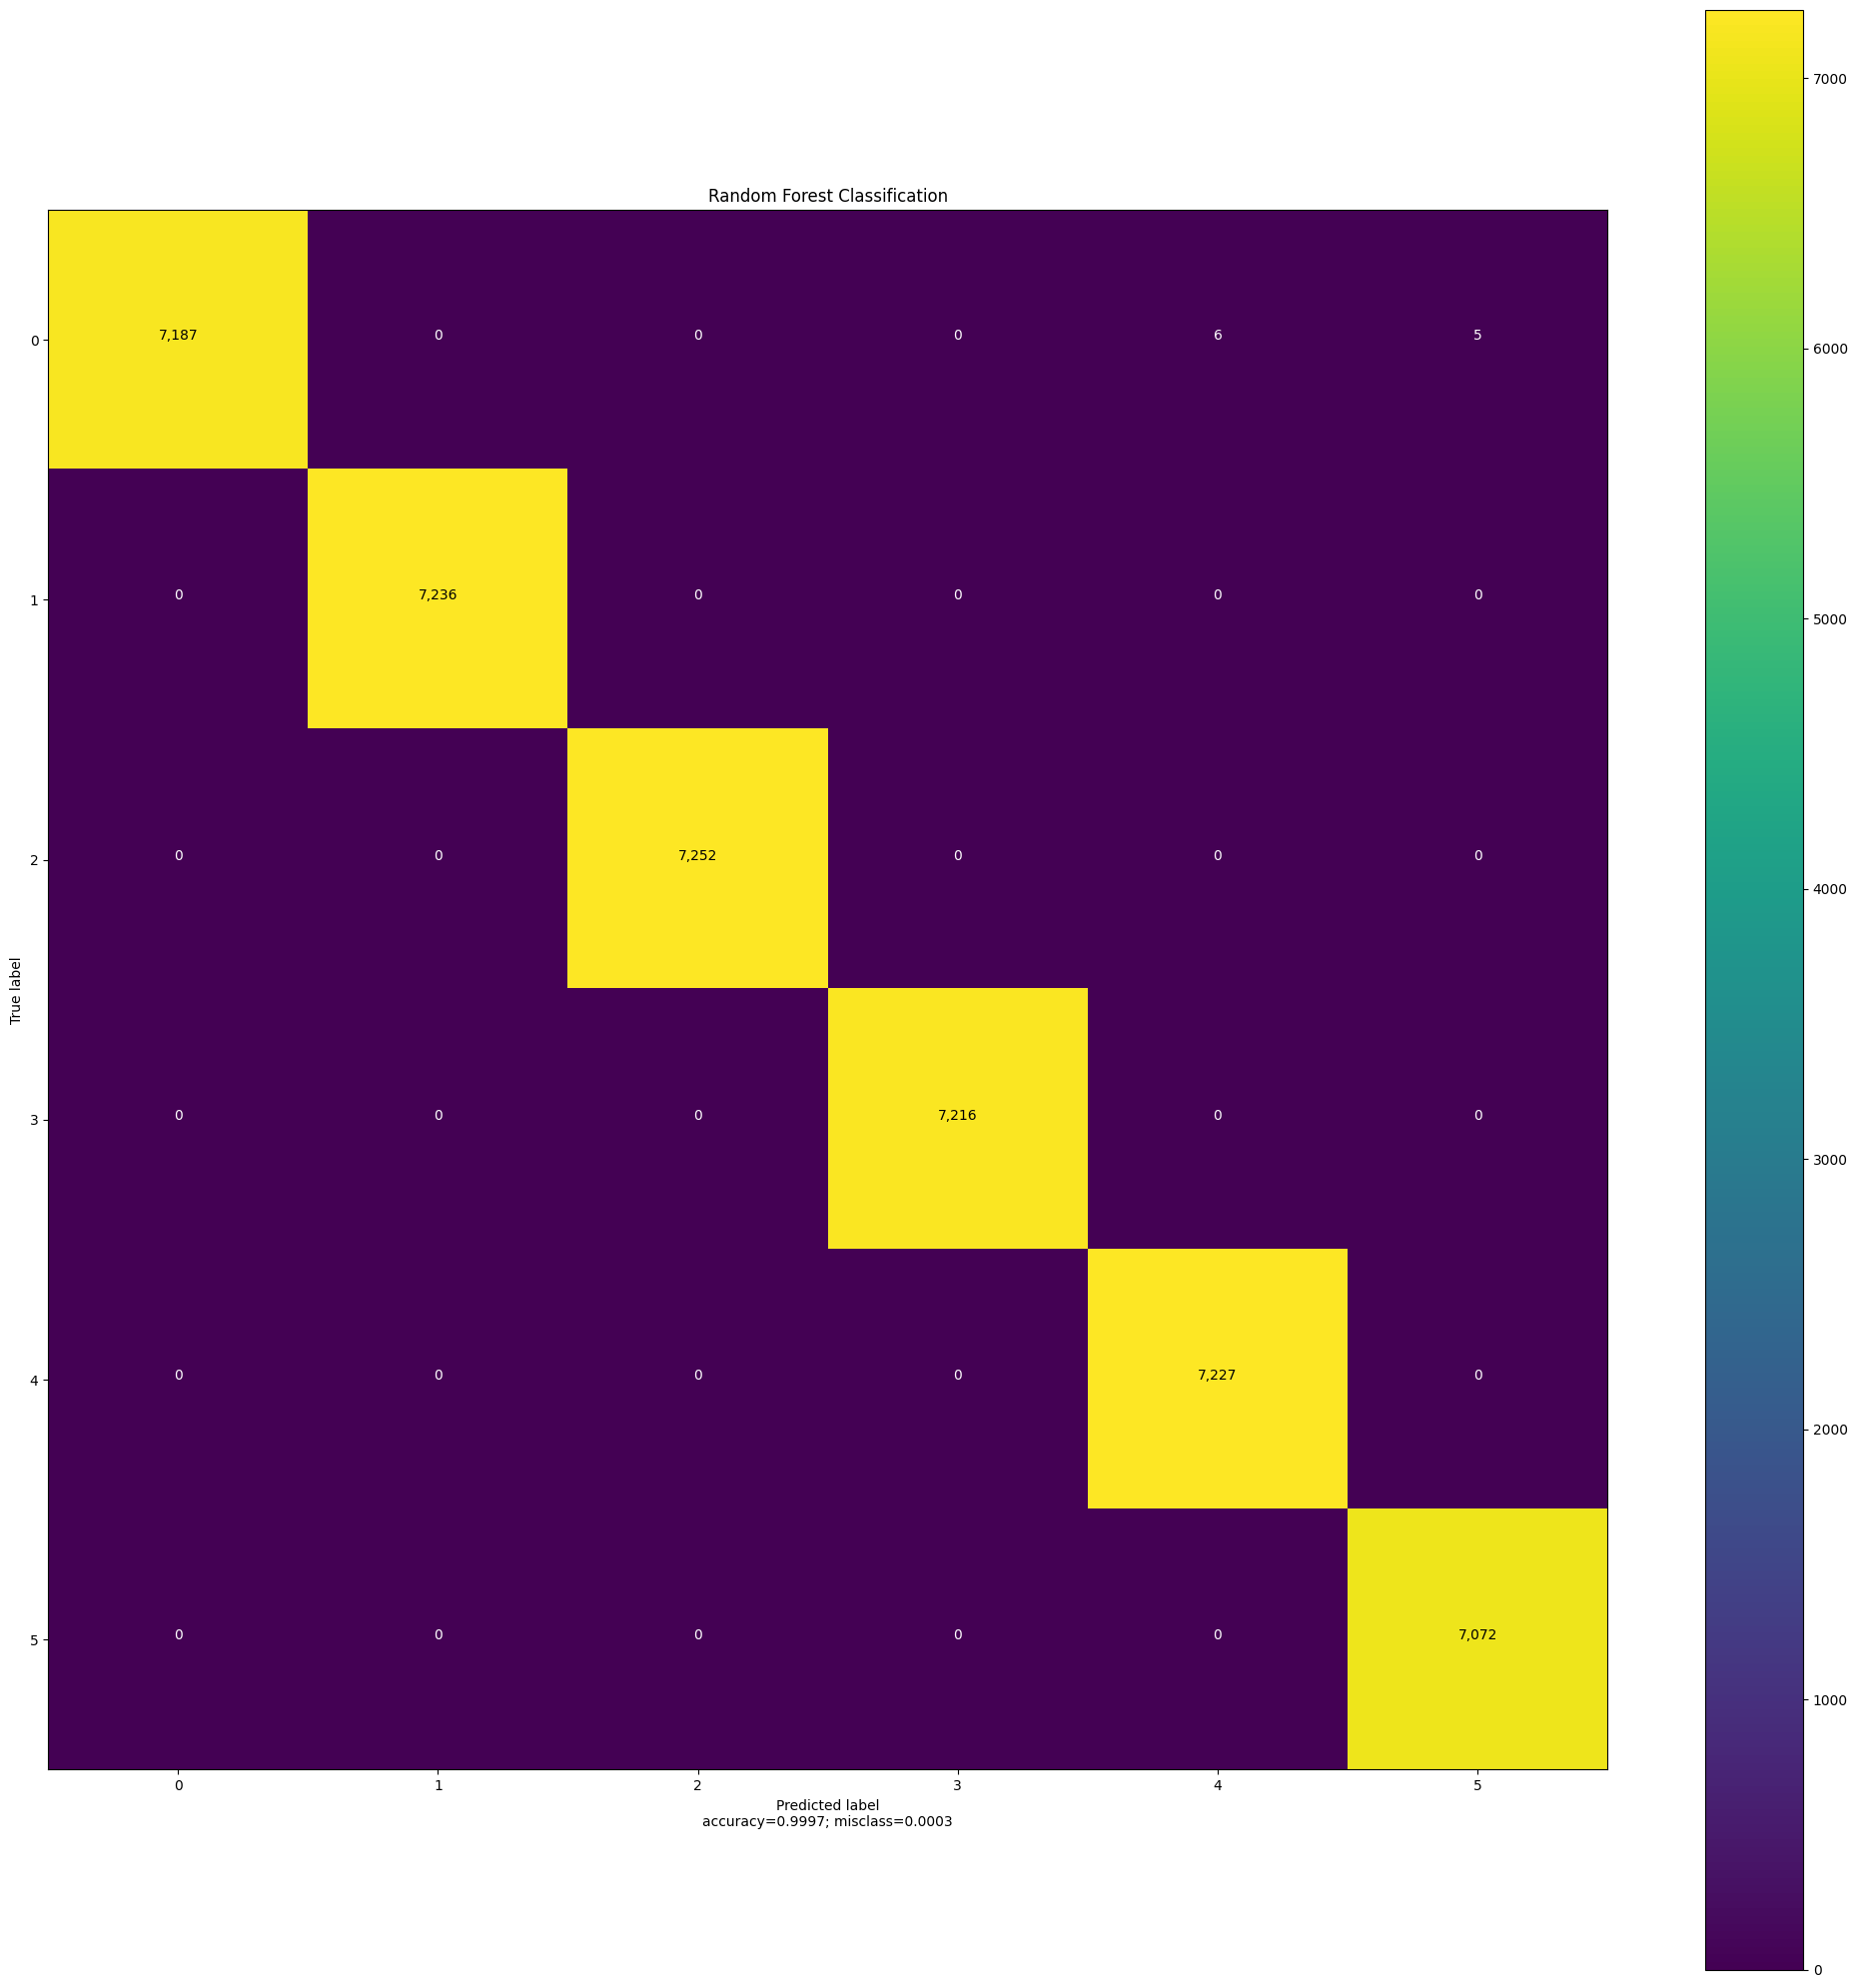

<Figure size 640x480 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_confusion_matrix(cm=confusion_matrix ,title= 'Random Forest Classification')

In [41]:
# performance metrics calculation of our model over test data set
start = time.time()
Predict_X =  Random_Forest.predict(X_test)
scores = cross_val_score(Random_Forest, X_test, Y_test, cv=7)
accuracy = metrics.accuracy_score(Y_test,Predict_X)
confusion_matrix = metrics.confusion_matrix(Y_test, Predict_X)
classification = metrics.classification_report(Y_test, Predict_X)
print("Time taken to for performance matric calculation: ", time.time()-start," seconds")

Time taken to for performance matric calculation:  19.31753897666931  seconds


In [42]:
print()
print('--------------------------- Results --------------------------------')
print()
print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()


--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.9966513637591142

Model Accuracy:
 0.9978395895220091

Confusion matrix:
 [[3074    0    2    4    5    3]
 [   0 3050    0    0    0    0]
 [   0    0 3031    2    1    0]
 [   1    0    2 3067    0    0]
 [  19    0    1    0 3039    0]
 [   0    0    0    0    0 3214]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.99      1.00      0.99      3088
         DDoS       1.00      1.00      1.00      3050
DoS GoldenEye       1.00      1.00      1.00      3034
     DoS Hulk       1.00      1.00      1.00      3070
        Other       1.00      0.99      1.00      3059
     PortScan       1.00      1.00      1.00      3214

     accuracy                           1.00     18515
    macro avg       1.00      1.00      1.00     18515
 weighted avg       1.00      1.00      1.00     18515




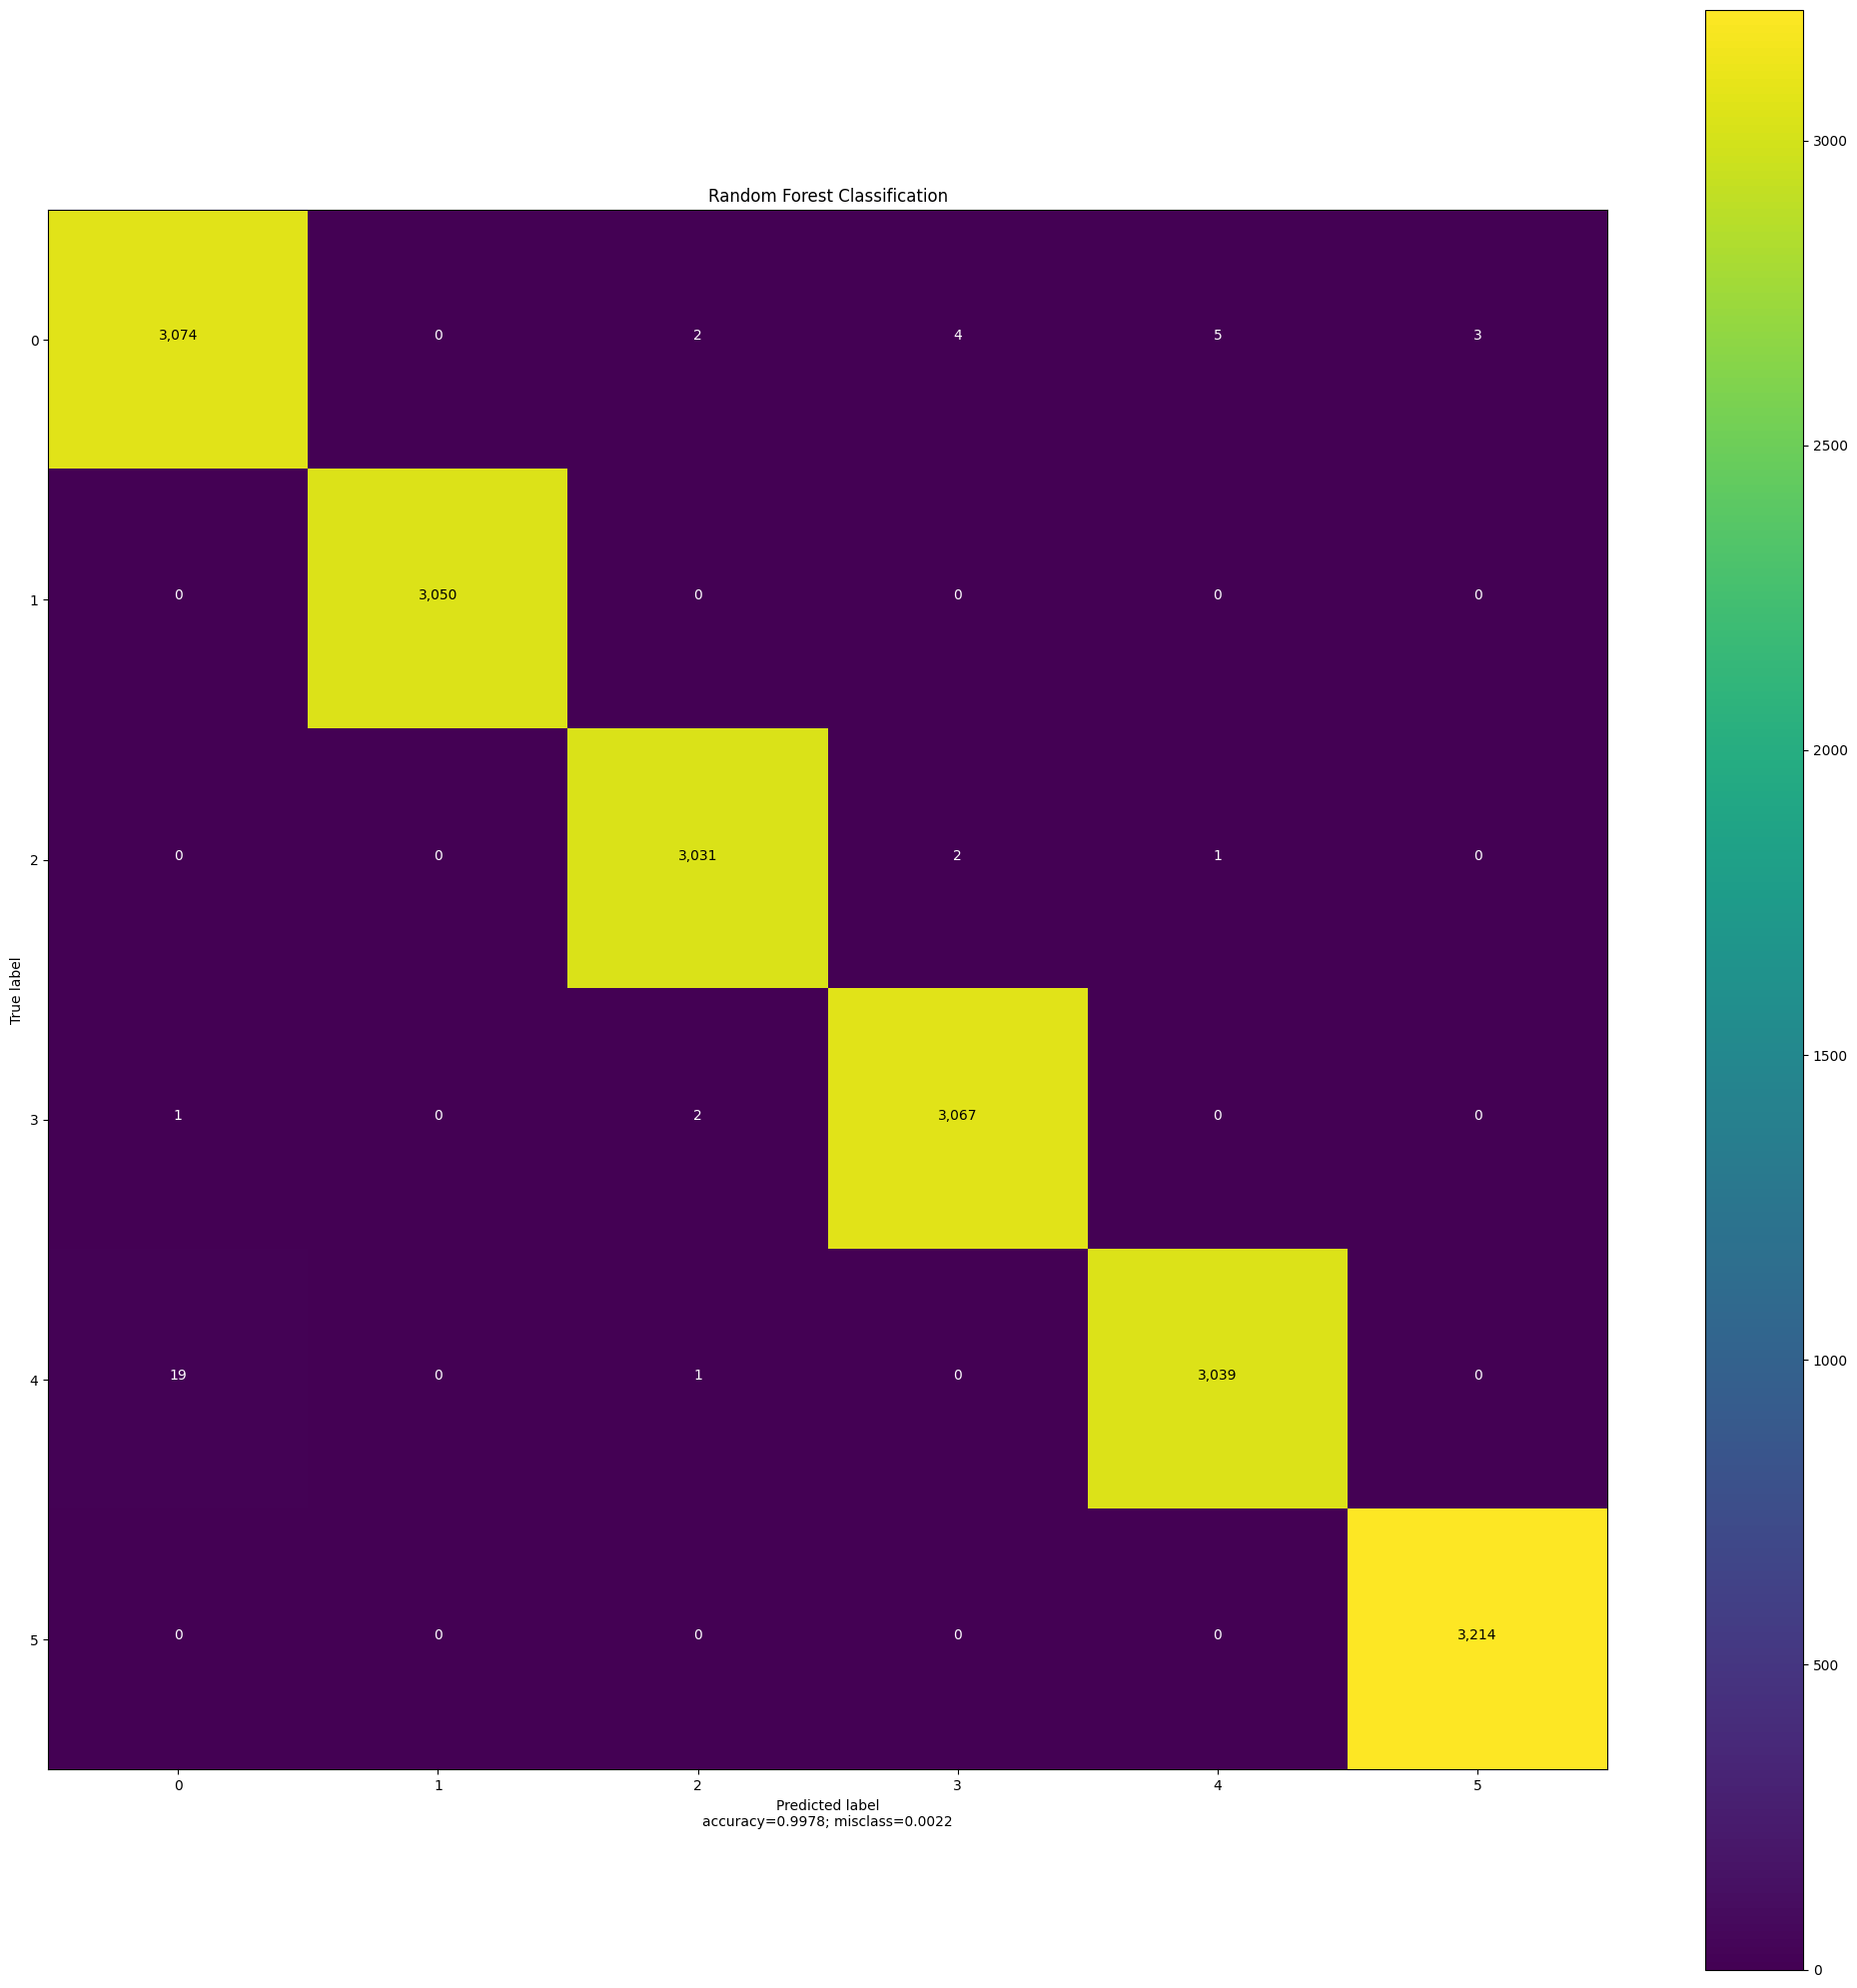

<Figure size 640x480 with 0 Axes>

In [43]:
plot_confusion_matrix(cm=confusion_matrix ,title= 'Random Forest Classification')

In [1]:
X_test

NameError: name 'X_test' is not defined